# Customer Segmentation

The project aims to identify customer types and create a customer segmentation. The data set contains several key demographical information of a registered customer base of a retail store, that also depicts their spending habits, purchases made in-store and online as well as using a catalogue, use of promotions, days since last activity as well as any complaints by them.  

Data obtained from : https://www.kaggle.com/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

Data reading and wrangling

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep ='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Drop unwanted columns and  rows with missing values for income

In [6]:
data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [7]:
from datetime import datetime
data['Dt_Customer'] = (pd.to_datetime('2017-01-01') - pd.to_datetime(data['Dt_Customer'])).dt.days 
# assuming data set available on 2017

In [8]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   Dt_Customer  Recency  MntWines  ...  MntMeatProducts  MntFishProducts  \
0         1728       58       635  ...              546              172   
1          882       38        11  ...                6                2   
2         1229       26       426  ...              127              111   
3          822       26        11  ...               20               10   
4         1078       94       173  ...              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  
0                   10                  4                  7         0  
1                    1                  2                  5         0  
2                    2                 10                  4         0  
3                    0                  4                  6         0  
4                    3                  6                  5         0  

[5 rows x 21 columns]

Cleaning the data

In [9]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
data['Marital_Status'].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

In [11]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [12]:
data['Education'].replace({'Basic' : 'Undergrad','2n Cycle': 'Undergrad', 'Graduation':'Graduate'},inplace=True)

In [13]:
data['age'] = 2017 - data['Year_Birth'] #assuming the data set is obtained in 2017. 

In [14]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

In [15]:
data.head()

ID  Year_Birth Education Marital_Status   Income  Dt_Customer  Recency  \
0  5524        1957  Graduate         Single  58138.0         1728       58   
1  2174        1954  Graduate         Single  46344.0          882       38   
2  4141        1965  Graduate       Together  71613.0         1229       26   
3  6182        1984  Graduate       Together  26646.0          822       26   
4  5324        1981       PhD        Married  58293.0         1078       94   

   MntWines  MntFruits  MntMeatProducts  ...  MntSweetProducts  MntGoldProds  \
0       635         88              546  ...                88            88   
1        11          1                6  ...                 1             6   
2       426         49              127  ...                21            42   
3        11          4               20  ...                 3             5   
4       173         43              118  ...                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Complain  age  Children  
0                  7         0   60         0  
1                  5         0   63         2  
2                  4         0   52         0  
3                  6         0   33         1  
4                  5         0   36         1  

[5 rows x 21 columns]

### Customer demographics

In [16]:
cols = ['age', 'Education', 'Marital_Status', 'Income', 'Children',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

In [17]:
df = data[cols]

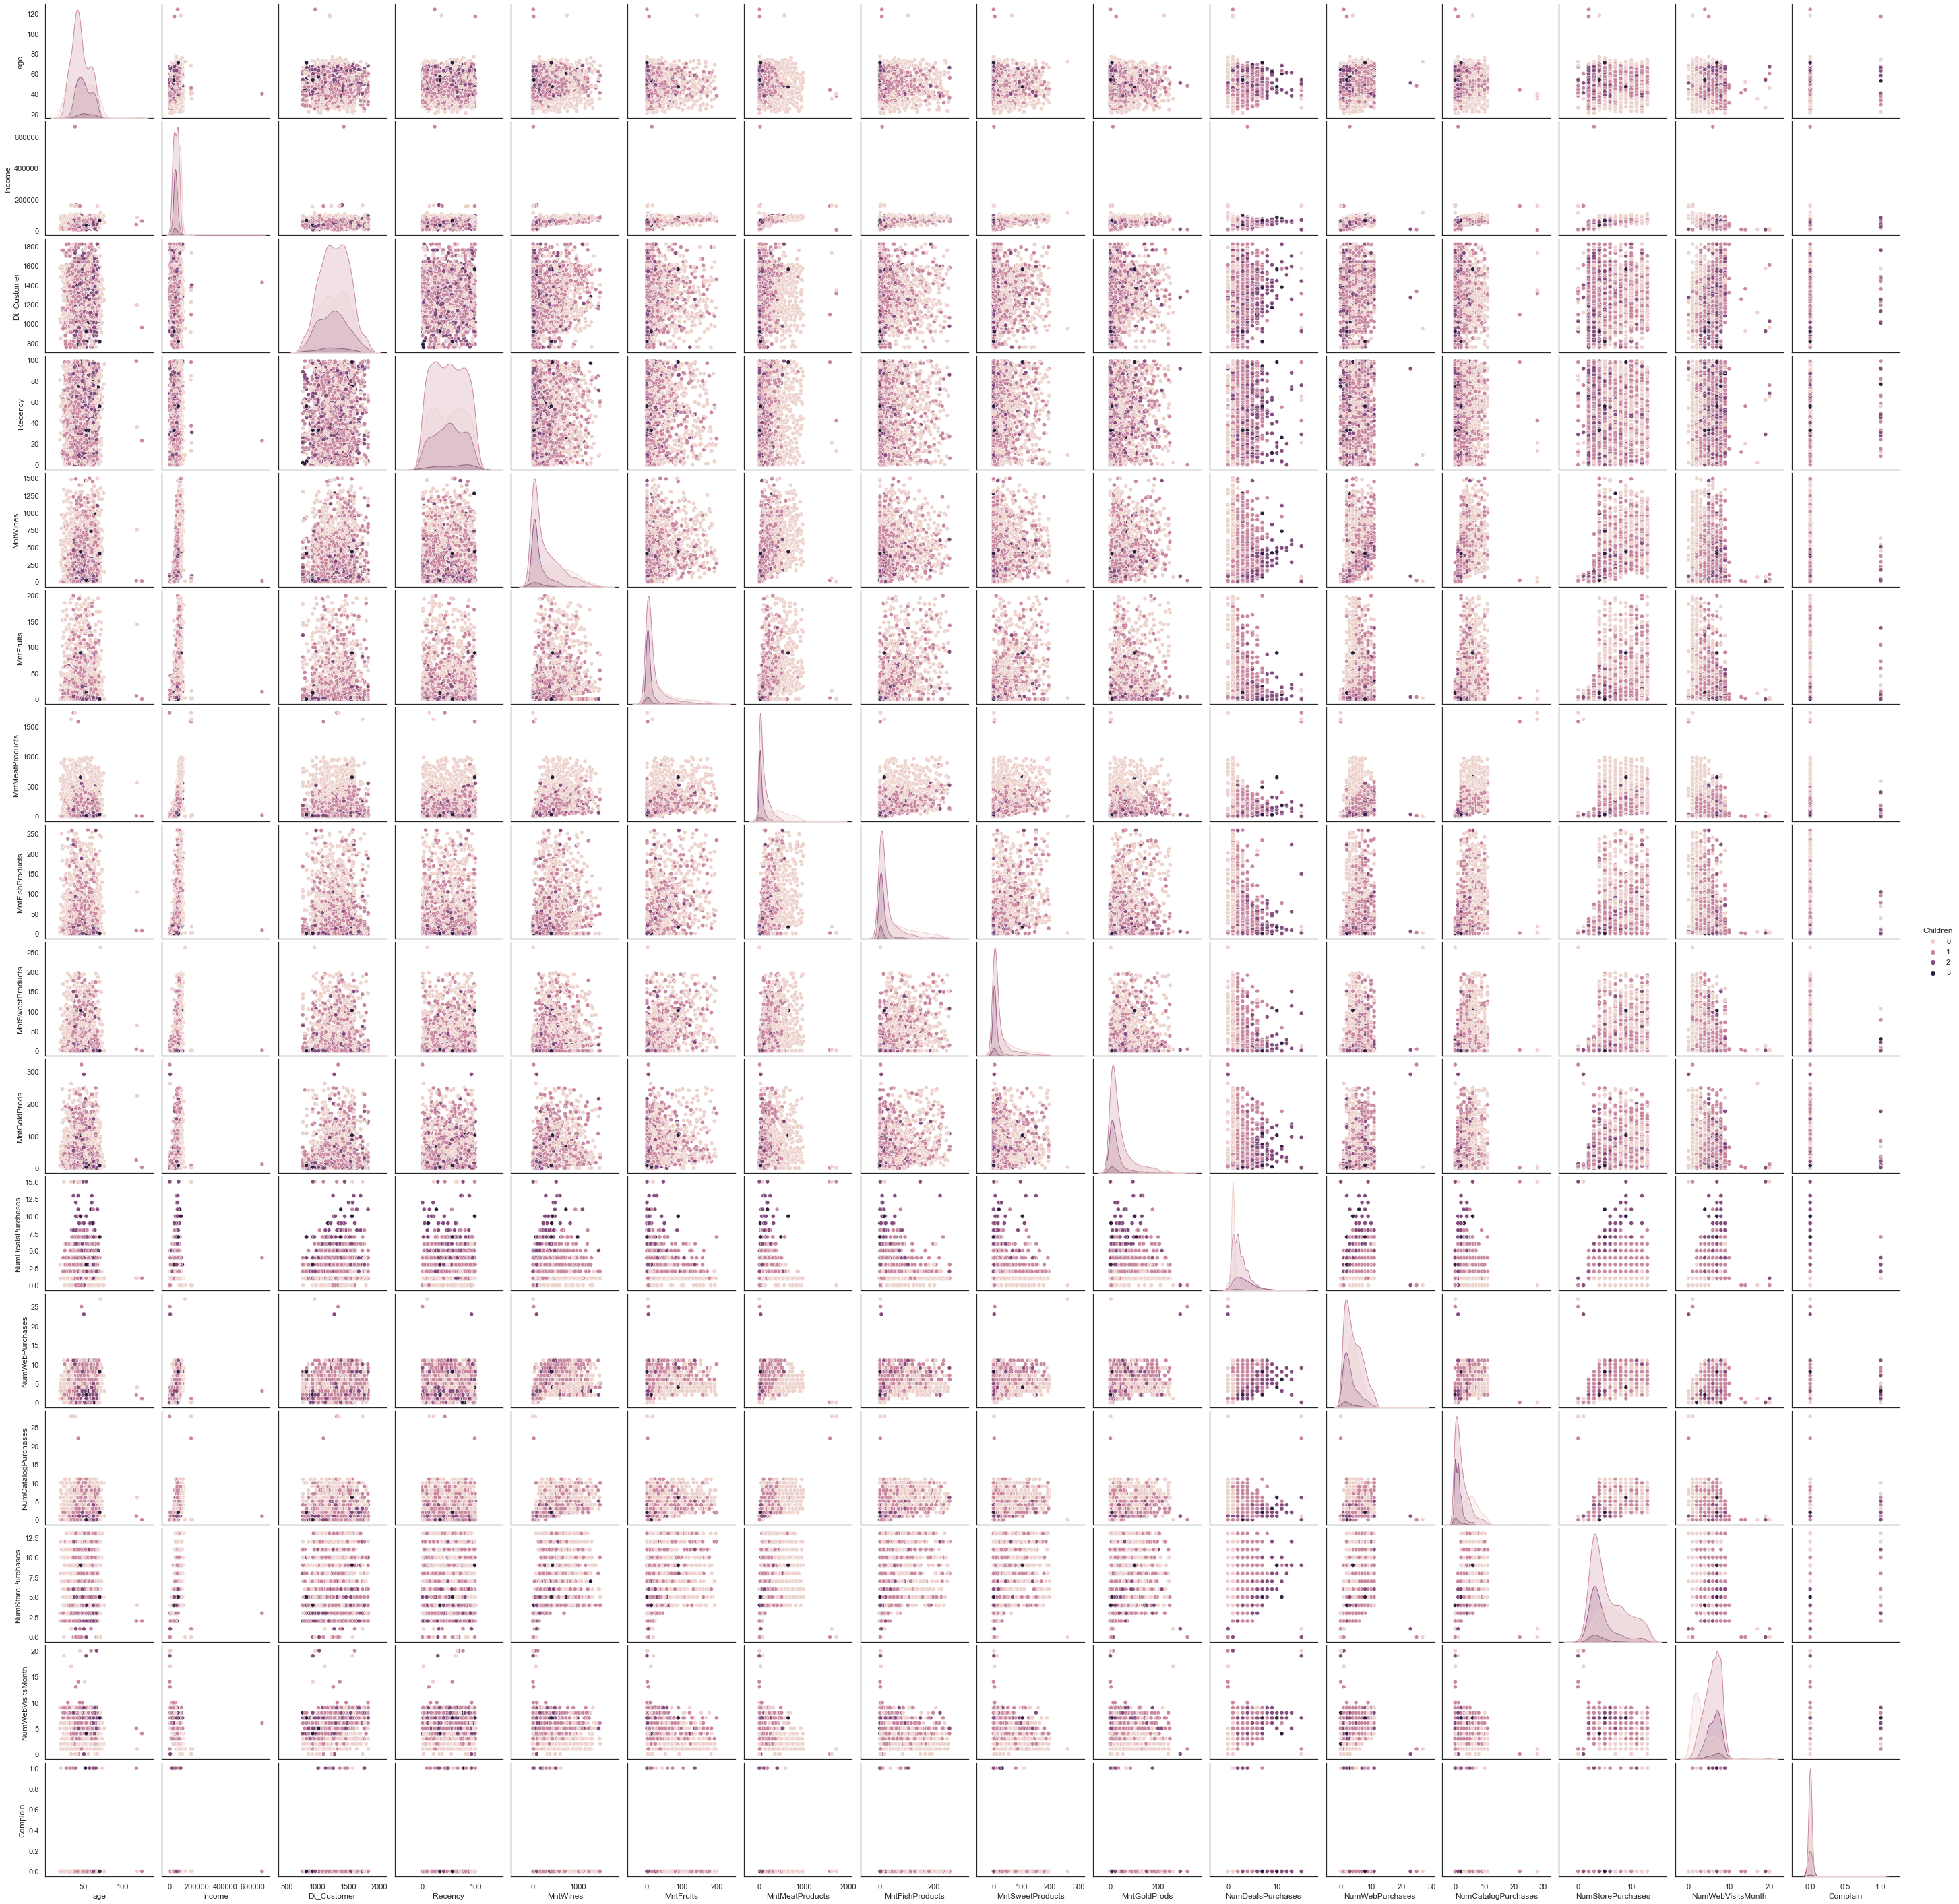

In [18]:
sns.pairplot(df , hue='Children')

Remove outliers

In [19]:
idx = df.loc[df['age']>80].index.tolist()
df.drop(axis=0, index=idx, inplace=True)

In [20]:
idx = df.loc[df['Income']> 200000].index.tolist()
df.drop(axis=0, index=idx, inplace=True)

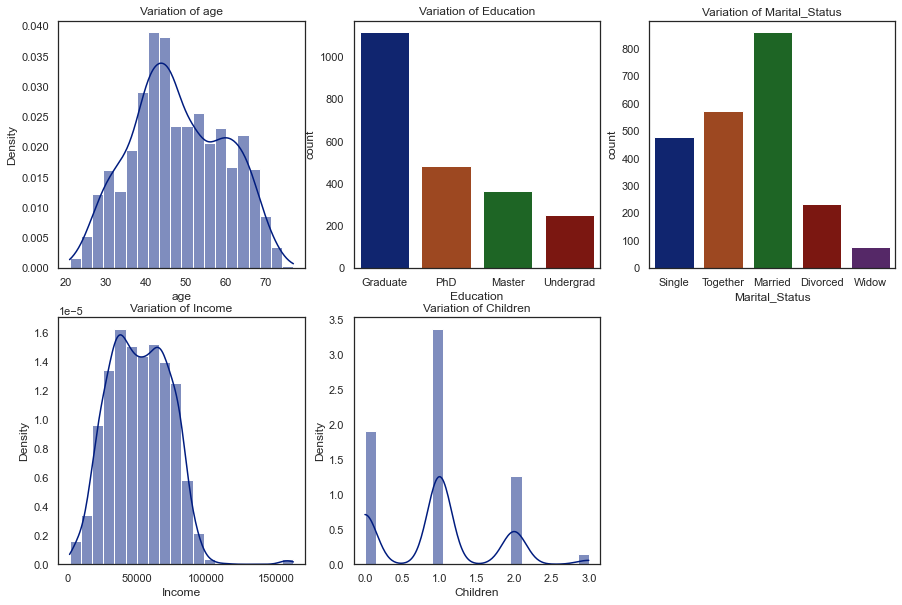

In [21]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['age','Education', 'Marital_Status', 'Income', 'Children']:
    n+=1
    plt.subplot(2,3,n)
    if(x in ['age','Income','Children']):
        sns.histplot(df[x], bins =20, kde=True, stat="density")
    else:
        sns.countplot(x = x, data=df )
    plt.title('Variation of {}'.format(x))
plt.show()

### Customer Spending patterns

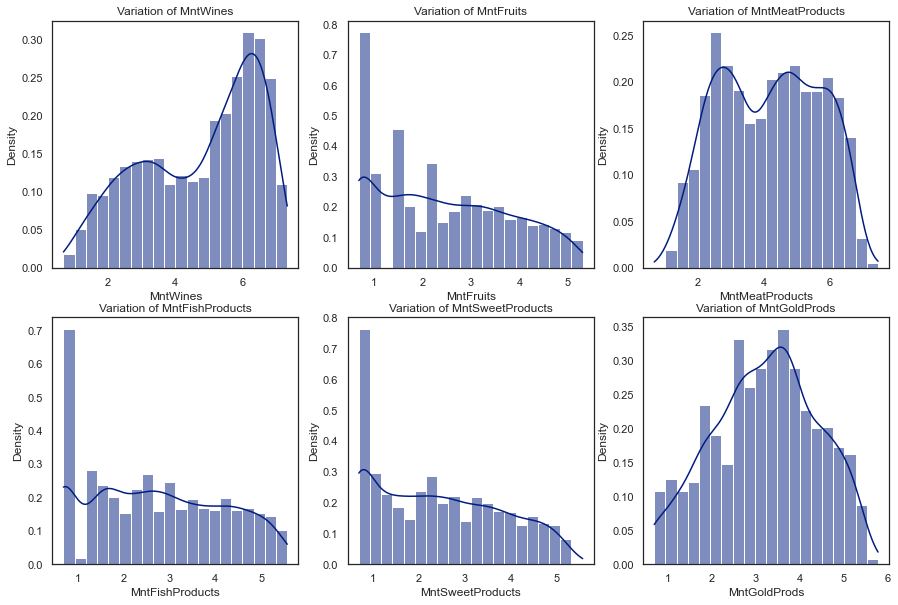

In [22]:
# Convert to log scale

plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    df[x] = df[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,3,n)
    sns.histplot(df[x], bins =20, kde=True, stat="density")
    plt.title('Variation of {}'.format(x))
                 
plt.show()

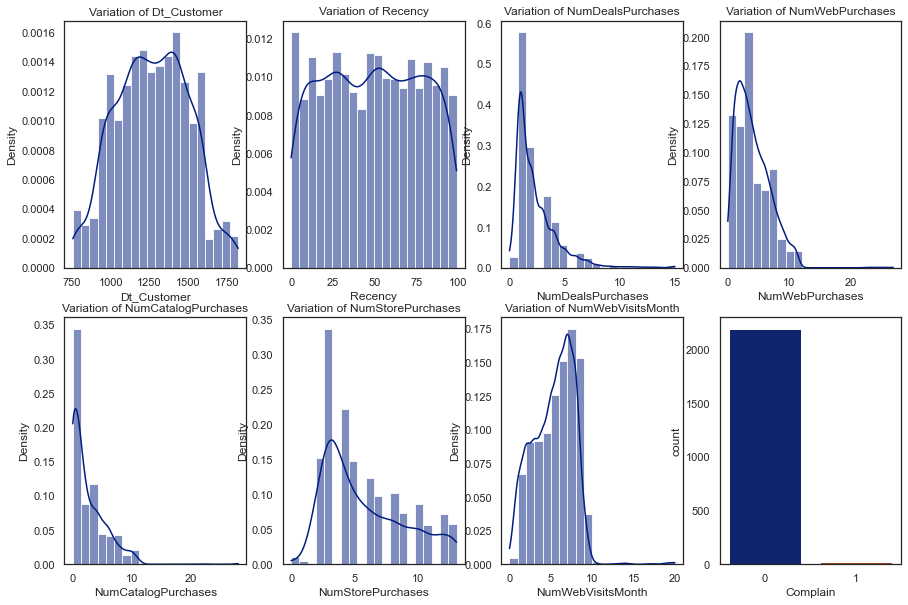

In [23]:
# Convert to log scale

plt.figure(1, figsize= (15,10))
n=0
for x in ['Dt_Customer', 'Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
#    df[x] = df[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,4,n)
    if(x =='Complain'):
        sns.countplot(x = x, data=df )
        continue
    sns.histplot(df[x], bins =20, kde=True, stat="density")
    

    plt.title('Variation of {}'.format(x))
                 
plt.show()

## Apply Clustering

In [24]:
df.head()

age Education Marital_Status   Income  Children  Dt_Customer  Recency  \
0   60  Graduate         Single  58138.0         0         1728       58   
1   63  Graduate         Single  46344.0         2          882       38   
2   52  Graduate       Together  71613.0         0         1229       26   
3   33  Graduate       Together  26646.0         1          822       26   
4   36       PhD        Married  58293.0         1         1078       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  6.456770   4.499810         6.306275         5.159055          4.499810   
1  2.564949   1.098612         2.079442         1.386294          1.098612   
2  6.059123   3.931826         4.859812         4.727388          3.135494   
3  2.564949   1.791759         3.091042         2.484907          1.609438   
4  5.164786   3.806662         4.787492         3.871201          3.367296   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      4.499810                  3                8                   10   
1      2.079442                  2                1                    1   
2      3.784190                  1                8                    2   
3      1.945910                  2                2                    0   
4      2.833213                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  
0                  4                  7         0  
1                  2                  5         0  
2                 10                  4         0  
3                  4                  6         0  
4                  6                  5         0

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

le1= LabelEncoder()
le2= LabelEncoder()
df['Education'] = df[['Education']].apply(le1.fit_transform)
df['Marital_Status'] = df[['Marital_Status']].apply(le2.fit_transform)


In [26]:
df.head()

age  Education  Marital_Status   Income  Children  Dt_Customer  Recency  \
0   60          0               2  58138.0         0         1728       58   
1   63          0               2  46344.0         2          882       38   
2   52          0               3  71613.0         0         1229       26   
3   33          0               3  26646.0         1          822       26   
4   36          2               1  58293.0         1         1078       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  6.456770   4.499810         6.306275         5.159055          4.499810   
1  2.564949   1.098612         2.079442         1.386294          1.098612   
2  6.059123   3.931826         4.859812         4.727388          3.135494   
3  2.564949   1.791759         3.091042         2.484907          1.609438   
4  5.164786   3.806662         4.787492         3.871201          3.367296   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      4.499810                  3                8                   10   
1      2.079442                  2                1                    1   
2      3.784190                  1                8                    2   
3      1.945910                  2                2                    0   
4      2.833213                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  
0                  4                  7         0  
1                  2                  5         0  
2                 10                  4         0  
3                  4                  6         0  
4                  6                  5         0

d:\miniconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  f"KMeans is known to have a memory leak on Windows "


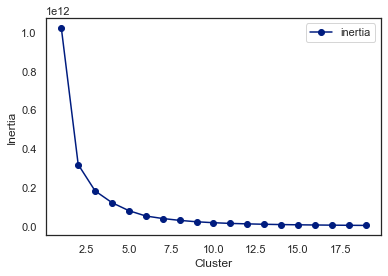

In [27]:
km_list = list()
for clust in range(1,20):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df)
    km_list.append(pd.Series({'clusters': clust, 'inertia': km.inertia_, 'model': km}))

plot_data = (pd.concat(km_list, axis=1).T[['clusters','inertia']].set_index('clusters'))
ax = plot_data.plot(marker='o',ls='-')
ax.set(xlabel='Cluster', ylabel='Inertia');

In [28]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
df['Kmeans'] = km.fit_predict(df)

### Visualize Clusters

Text(0.5, 1.0, 'Scatter plot of age compared with Income')

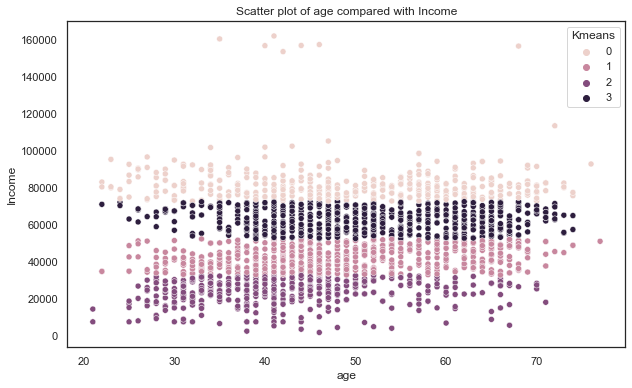

In [29]:
plt.figure(1, figsize= (10,6))
sns.scatterplot( data = df, x ='age', y='Income', hue = 'Kmeans')
plt.title('Scatter plot of age compared with Income')


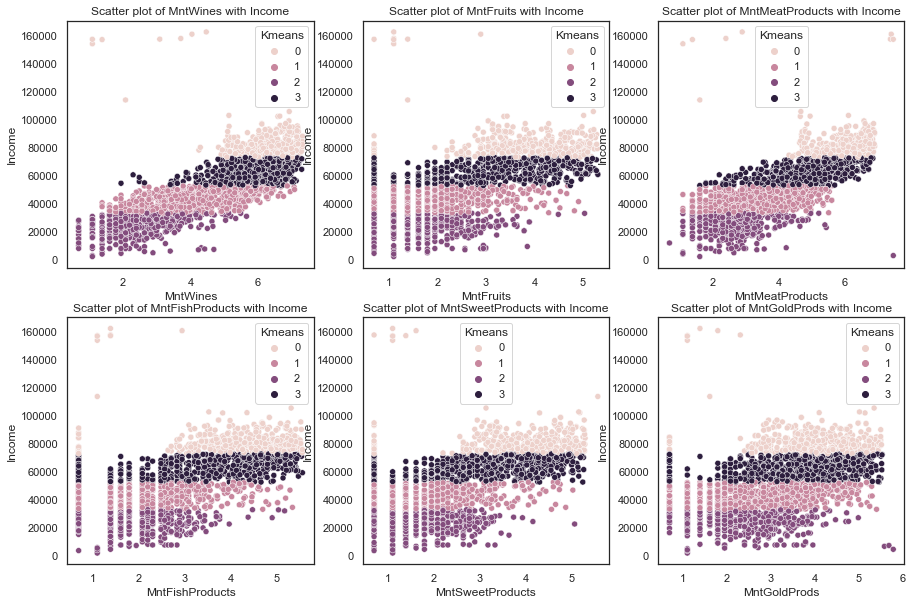

In [30]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Kmeans')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

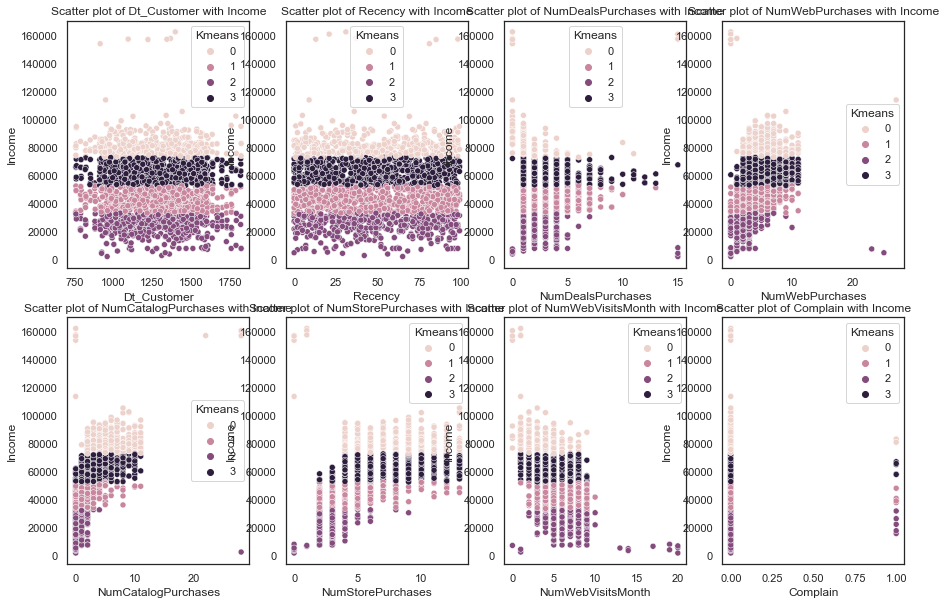

In [31]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Dt_Customer', 'Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(2,4,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Kmeans')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

### Visualize based on Clusters

Text(0.5, 1.0, 'Swarm plot of age with Clusters')

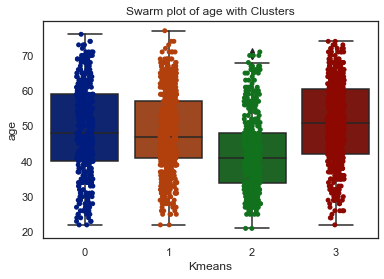

In [32]:
sns.stripplot(x='Kmeans', y='age', data=df)
sns.boxplot(x='Kmeans', y='age', data=df)
plt.title('Swarm plot of age with Clusters')

Text(0.5, 1.0, 'Swarm plot of Income with Clusters')

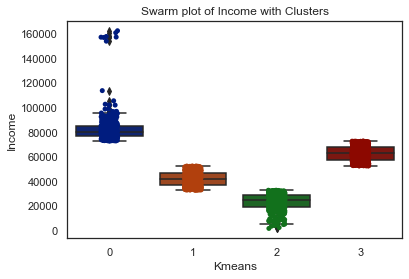

In [33]:
sns.stripplot(x='Kmeans', y='Income', data=df)
sns.boxplot(x='Kmeans', y='Income', data=df)
plt.title('Swarm plot of Income with Clusters')

In [34]:
df['totSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Text(0.5, 1.0, 'Swarm plot of total spent with Clusters')

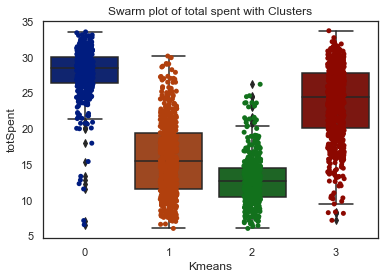

In [35]:
sns.stripplot(x='Kmeans', y='totSpent', data=df)
sns.boxplot(x='Kmeans', y='totSpent', data=df)
plt.title('Swarm plot of total spent with Clusters')

Text(0.5, 1.0, 'Bar plot of Clusters with Children Info')

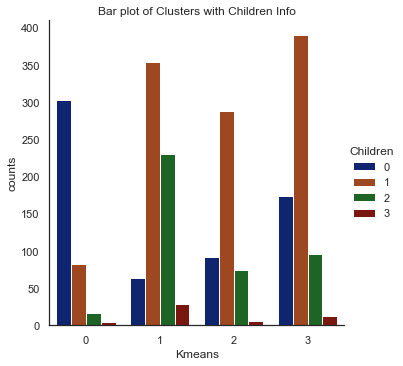

In [36]:
#df1 = df[['Kmeans','age','Children','Marital_Status','Education']]
df1 = df[['Kmeans','age','Children']]
df1 = df1.groupby(['Kmeans','Children']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Kmeans',y='counts', hue='Children', kind ='bar')
plt.title('Bar plot of Clusters with Children Info')

In [37]:
df['Education'] = df[['Education']].apply(le1.inverse_transform)
df['Marital_Status'] = df[['Marital_Status']].apply(le2.inverse_transform)

Text(0.5, 1.0, 'Bar plot of Clusters with Marital_Status Info')

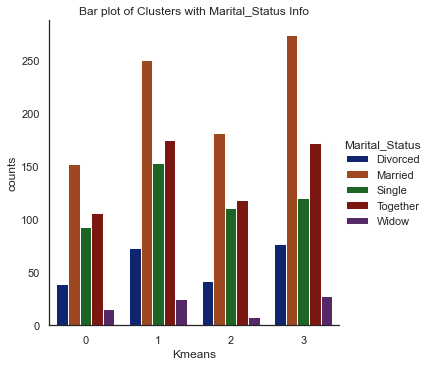

In [38]:
#df1 = df[['Kmeans','age','Children','Marital_Status','Education']]
df1 = df[['Kmeans','age','Marital_Status']]
df1 = df1.groupby(['Kmeans','Marital_Status']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Kmeans',y='counts', hue='Marital_Status', kind ='bar')
plt.title('Bar plot of Clusters with Marital_Status Info') 

Text(0.5, 1.0, 'Bar plot of Clusters with Education Info')

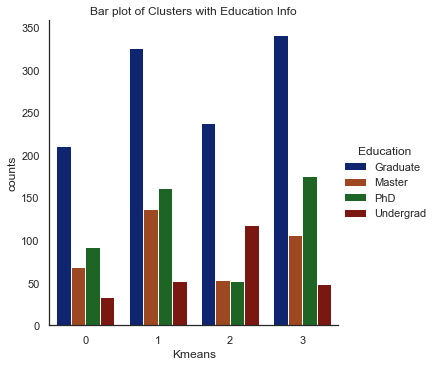

In [39]:
#df1 = df[['Kmeans','age','Children','Marital_Status','Education']]
df1 = df[['Kmeans','age','Education']]
df1 = df1.groupby(['Kmeans','Education']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Kmeans',y='counts', hue='Education', kind ='bar')
plt.title('Bar plot of Clusters with Education Info') 

## Positioning the clusters and conclusions

- Cluster 0 : Oldest, Above average income,  average have two childern
- Cluster 1 : Youngest, lowest income holders, lowerst spenders
- Cluster 2 : Middle aged, Higest erners, Highest spenders. 
- Cluster 3 : Middle aged, below average income erners, higher number of children comparatively. 